In [15]:
import cv2

# Load the image
image = cv2.imread('C:\\Users\\jason\\ECE_479\\final_project_2\\PiCam images\\9d.png')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply a threshold to obtain a binary image
_, thresh = cv2.threshold(gray, 50, 80, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get the largest contour (assuming it's the playing card)
largest_contour = max(contours, key=cv2.contourArea)

# Get the bounding rectangle around the contour
x, y, w, h = cv2.boundingRect(largest_contour)

# Crop the image using the bounding rectangle
cropped_image = image[y:y+h, x:x+w]

# Display the cropped image
cv2.imshow('Cropped Image', cropped_image)

# Save the cropped image
cv2.imwrite('cropped_image.jpg', cropped_image)


True

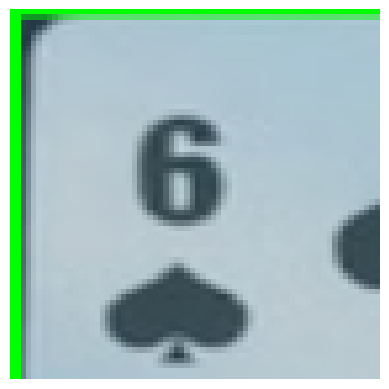

In [10]:
top_left = cv2.resize(cropped_image, (224, 224))
top_left = top_left[0:70, 0:70]

plt.imshow(top_left)
plt.axis('off')  # Hide axis
plt.show()

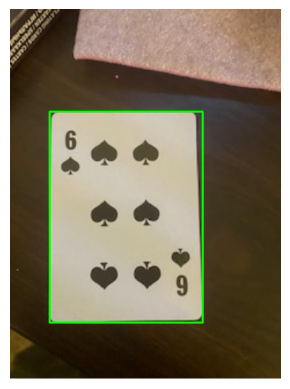

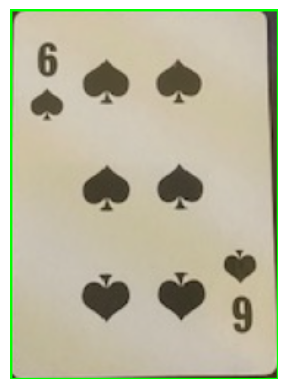

In [74]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### ---- INITIALIZATION ---- ###
# Define font to use
font = cv2.FONT_HERSHEY_SIMPLEX

### ---- FUNCTIONS ---- ###

def preprocess_image(image):
    # Pre-process image (convert to grayscale, blur, and threshold)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)[1]
    return thresh

def find_card(image):
    # Find contours of cards
    cnts, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
    if cnts:
        # Get the largest contour (assumed to be the card)
        return cnts[0]
    else:
        return None

def preprocess_card(cnt, image):
    # Pre-process card contour
    x, y, w, h = cv2.boundingRect(cnt)
    card = image[y:y+h, x:x+w]
    return card

### ---- MAIN FUNCTION ---- ###

def detect_card(image_path):
    # Read image
    image = cv2.imread(image_path)

    # Preprocess image
    pre_proc = preprocess_image(image)

    # Find contour of card
    card_contour = find_card(pre_proc)

    # If card contour is found, proceed
    if card_contour is not None:
        # Preprocess the card contour
        card_image = preprocess_card(card_contour, image)

        # Draw bounding box around the card on the original image
        x, y, w, h = cv2.boundingRect(card_contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Crop the card
        cropped_card = image[y:y+h, x:x+w]
        cv2.imwrite('cropped_testimg.png', cropped_card)

        # Display the original image with bounding box
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

        # Display the cropped card
        plt.imshow(cv2.cvtColor(cropped_card, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
    else:
        print("No card detected in the image.")

# Example usage
image_path = "PiCam images\\6S.png"
# image_path = "testimg3.png"
detect_card(image_path)
